# Unfooded Country Analysis from FAO R&D's department  

## 1. Data preprocessing

    1.1 Loading natives data with Pandas
        1.1.1 Food resources availibility's by countries by product
        1.1.2 Amout of food resources given to countries in food deficit
        1.1.3 Food insecurity describes by the number of undernurished people
        1.1.4 Population by countries
    1.2 Have a quick look to our data distributions
    1.3 How to deal with missing values

## 2. Compute data for answering to Marc's requests

    2.1 Unnourished people proportion in 2017
    2.2 Number of people which can be fooded with global food stock
    2.3 Number of people which can be fooded with vegetables
    2.4 The use of global food stock across each countries


## 3. Compute data for answering to Mélanie's requests

    3.1 Solution for request 1
    3.2 Solution for request 2
    3.3 Solution for request 3

# 1. Data preprocessing
## 1.1 Loading natives data into Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.1.1 Availibility of food resources by countries by type of product

In [2]:
dispo_alim = pd.read_csv('P4OC - FAO/dispo_alimentaire.csv', header=0, sep=",")

In [3]:
dispo_alim

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
dispo_alim.isna().describe()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605,15605
unique,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,True,True,True
freq,15605,15605,15605,12885,10109,14241,14015,11794,11561,15382,12226,14852,14015,11327,9180,13514,13313,8829


In [5]:
dispo_alim_animaux = dispo_alim[dispo_alim['Aliments pour animaux'].isna() == False]

In [6]:
dispo_alim_copy = dispo_alim.copy()

In [7]:
dispo_alim_copy = dispo_alim_copy.replace(np.nan, 0)

In [8]:
dispo_alim_copy[dispo_alim_copy['Produit'] == 'Abats Comestible']

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
60,Afrique du Sud,Abats Comestible,animale,0.0,48.0,17.0,4.81,0.53,2.58,302.0,10.0,71.0,254.0,0.0,241.0,0.0,0.0,0.0
155,Albanie,Abats Comestible,animale,0.0,0.0,11.0,3.50,0.40,1.60,11.0,0.0,1.0,11.0,0.0,10.0,0.0,0.0,0.0
247,Algérie,Abats Comestible,animale,0.0,0.0,4.0,1.45,0.18,0.63,57.0,0.0,1.0,57.0,0.0,56.0,0.0,0.0,0.0
340,Allemagne,Abats Comestible,animale,1.0,7.0,2.0,0.75,0.06,0.37,70.0,694.0,143.0,62.0,0.0,605.0,0.0,0.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15153,Émirats arabes unis,Abats Comestible,animale,0.0,1.0,6.0,2.10,0.24,0.94,21.0,0.0,6.0,20.0,0.0,15.0,0.0,0.0,0.0
15245,Équateur,Abats Comestible,animale,0.0,0.0,10.0,3.39,0.25,1.70,53.0,0.0,3.0,53.0,0.0,50.0,0.0,0.0,0.0
15340,États-Unis d'Amérique,Abats Comestible,animale,800.0,0.0,1.0,0.44,0.03,0.22,938.0,664.0,65.0,142.0,0.0,1536.0,0.0,0.0,0.0
15435,Éthiopie,Abats Comestible,animale,0.0,0.0,4.0,1.32,0.14,0.61,123.0,1.0,0.0,124.0,0.0,124.0,0.0,0.0,0.0


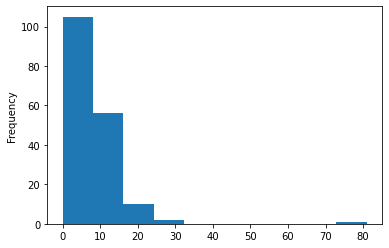

In [9]:
dispo_alim_copy[dispo_alim_copy['Produit'] == 'Abats Comestible']['Disponibilité alimentaire (Kcal/personne/jour)'].plot.hist()
plt.show()

### 1.1.2 Food resources given to countries in food deficit

In [10]:
aide_alim = pd.read_csv('P4OC - FAO/aide_alimentaire.csv', header=0, sep=',')

In [11]:
aide_alim.head(10)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
5,Afghanistan,2014,Céréales,15989
6,Afghanistan,2013,"Fruits secs, total",85
7,Afghanistan,2013,Huiles végétales,11087
8,Afghanistan,2014,Huiles végétales,8185
9,Afghanistan,2013,"Légumineuses Sèches,Tot.",11761


In [12]:
aide_alim.sort_values(['Pays bénéficiaire','Année'], ascending=True)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
2,Afghanistan,2013,Blé et Farin,39224
4,Afghanistan,2013,Céréales,40504
6,Afghanistan,2013,"Fruits secs, total",85
7,Afghanistan,2013,Huiles végétales,11087
...,...,...,...,...
372,Éthiopie,2015,Huiles végétales,1826
375,Éthiopie,2015,"Légumineuses Sèches,Tot.",10519
378,Éthiopie,2015,Mélanges et préparations,4512
381,Éthiopie,2015,Non-céréales,15151


### 1.2.3 Food insecurity describe by the number of undernurished people

In [13]:
col_types = {'Zone' : str, 'Année' : str, 'Valeur' : int}
sous_alim = pd.read_csv('P4OC - FAO/sous_nutrition.csv', header=0, sep=',')

In [14]:
sous_alim['Valeur'].isna().describe()

count      1218
unique        2
top       False
freq        624
Name: Valeur, dtype: object

In [15]:
sous_alim.head(5)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [16]:
sous_alim['Valeur'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1213     True
1214     True
1215     True
1216     True
1217     True
Name: Valeur, Length: 1218, dtype: bool

In [17]:
# Suppression des lignes avec des valeurs manquantes
sous_alim[sous_alim['Valeur'].isna()==False]

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1195,Viet Nam,2013-2015,8.3
1196,Viet Nam,2014-2016,7.6
1197,Viet Nam,2015-2017,7.1
1198,Viet Nam,2016-2018,6.5


### 1.2.4 Population by countries

In [18]:
pop_pays = pd.read_csv('P4OC - FAO/population.csv', header=0, sep=',')

In [19]:
pop_pays.head(5)

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


<AxesSubplot:xlabel='Zone'>

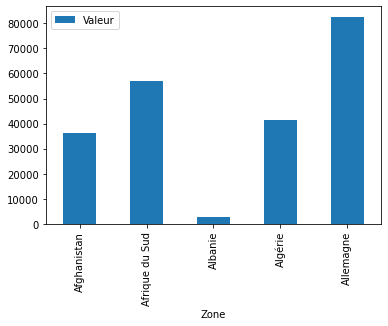

In [20]:
pop_pays[pop_pays['Année'] == 2017].set_index('Zone').head(5).plot.bar(y='Valeur')

In [21]:
pop_pays.isna().describe()

,Zone,Année,Valeur
count,1416,1416,1416
unique,1,1,1
top,False,False,False
freq,1416,1416,1416


## 1.3 How to deal with missing values

### 1.3.1 Food Unsecurity's data set

In [22]:
# Le nombre totale de personne en sous nutrition 
col_types = {'Zone' : str, 'Année' : str, 'Valeur' : np.float64}
sous_alim.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

In [23]:
sous_alim[sous_alim['Valeur'] == '<0.1']['Valeur']

60      <0.1
61      <0.1
62      <0.1
63      <0.1
64      <0.1
        ... 
1183    <0.1
1184    <0.1
1185    <0.1
1186    <0.1
1187    <0.1
Name: Valeur, Length: 120, dtype: object

In [24]:
# convert string into float
def convert_string_to_float(value):
    
    if value == '<0.1':
        return 0.1
    else :
        return np.float64(value)
    

In [25]:
sous_alim_copy = sous_alim.copy()

In [26]:
# proportion d'occurence '<0.1' dans Valeur 
sous_alim['Valeur'][sous_alim['Valeur'] == '<0.1'].count() / sous_alim['Valeur'].count()

0.19230769230769232

In [27]:
# replace nan value and convert string
sous_alim_copy['Valeur'] = sous_alim_copy['Valeur'].apply(convert_string_to_float).replace(np.nan, 0)

## 2.1 Unnourished people proportion in 2017

In [28]:
# La population mondiale en 2017
tot_pop = pop_pays['Valeur'][pop_pays['Année'] == 2017].sum()

In [29]:
# Population total en sous nutrition
tot_pop_sous_alim = sous_alim_copy['Valeur'][sous_alim_copy['Année'] == '2016-2018'].sum()*1000

In [30]:
tot_pop_sous_alim

537700.0

In [32]:
prop_sous_alim = tot_pop_sous_alim / tot_pop

In [33]:
prop_sous_alim

0.07123614817818384

In [34]:
size_prop_sous = [prop_sous_alim, 1-prop_sous_alim]

In [35]:
ranking_sous_alim_pays = sous_alim_copy[sous_alim_copy['Année'] == '2016-2018'][['Zone','Valeur']].sort_values(by='Valeur',ascending=False).head(10)

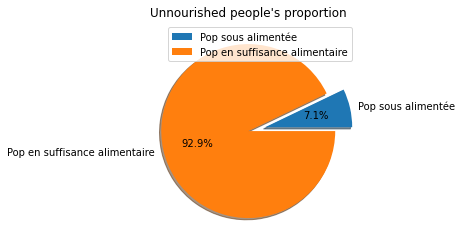

In [38]:

plt.pie(size_prop_sous, labels=['Pop sous alimentée', 'Pop en suffisance alimentaire'], explode = (0.2,0), autopct='%1.1f%%', shadow = True)
plt.legend(loc='upper right')
plt.title(label = "Unnourished people's proportion")
plt.show()

In [93]:
sous_alim_pop_total = sous_alim_copy[sous_alim_copy['Année'] == '2016-2018']['Valeur'].sum()
size = list(ranking_sous_alim_pays.Valeur/sous_alim_pop_total)
autre_country = 1 - sum(size)

In [94]:
len(size)

10

In [95]:
labels = [str(int(pos)) + '. ' + label for (pos, label) in zip (np.linspace(1,10,10),list(ranking_sous_alim_pays.Zone))]
size.insert(0, autre_country)
labels.insert(0, 'autres')

In [96]:
labels

['autres',
 '1. Inde',
 '2. Pakistan',
 '3. Indonésie',
 '4. Nigéria',
 '5. Bangladesh',
 '6. Éthiopie',
 '7. Philippines',
 '8. République-Unie de Tanzanie',
 '9. République populaire démocratique de Corée',
 '10. Kenya']

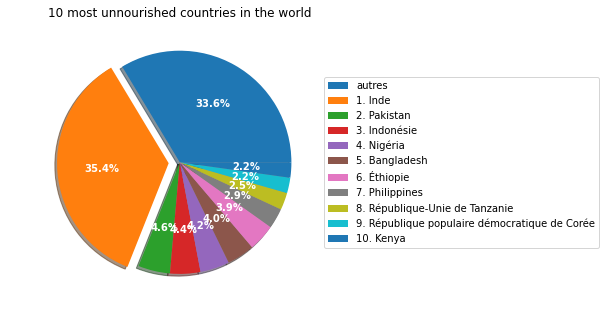

In [97]:
explode = [0 for i in range(1,12)]
explode[1] = 0.1
fig1, ax1  = plt.subplots(figsize=(5,6), subplot_kw=dict(aspect="equal"))
ax1.pie(size, labels=labels, autopct='%1.1f%%',
       shadow = True, textprops=dict(color="w", weight="bold"), explode = explode)
ax1.set_title("10 most unnourished countries in the world")
ax1.legend(labels,
        loc='center left',        
        bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


In [42]:
del size, labels

In [43]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

## 2.2 Volume of people which can be fooded with global food stock

In [98]:
dispo_alim_copy = dispo_alim.copy()

In [99]:
dispo_alim.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
mean,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
std,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,1113.100416,12067.344094,528.069224,10381.795904,549.834540
min,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000
max,150000.000000,347309.000000,1711.000000,430.760000,60.760000,54.970000,739267.000000,42797.000000,63381.000000,426850.000000,55047.000000,739267.000000,17060.000000,326711.000000,5284.000000


In [100]:
dispo_alim_copy['Disponibilité intérieure'] = dispo_alim_copy['Disponibilité intérieure'].replace(np.nan, 0)

In [101]:
volume_dispo_global = dispo_alim_copy['Disponibilité alimentaire (Kcal/personne/jour)'].sum()

In [102]:
dispo_alim_total_pays = dispo_alim_copy[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum().reset_index()

In [104]:
pop_pays_2017 = pop_pays[pop_pays['Année'] == 2017][['Zone','Valeur']]

In [105]:
capacite_alim_pays = dispo_alim_total_pays.join(pop_pays_2017.set_index('Zone'), 'Zone').rename({'Disponibilité alimentaire (Kcal/personne/jour)' : 'Disponibilité alimentaire totale (Kcal/personne/jour)'})

In [106]:
capacite_alim_pays['Disponibilité alimentaire totale'] = capacite_alim_pays['Disponibilité alimentaire (Kcal/personne/jour)'] * capacite_alim_pays['Valeur'] * 1000

In [107]:
# Disponibilité alimentaire mondiale en Kcal
dispo_alim_total = capacite_alim_pays['Disponibilité alimentaire totale'].sum()
# Apport journalier d'une personne adulte estimé à 2500 Kcal
nb_theorique_pers = dispo_alim_total / 2500

In [109]:
nb_theorique_pers

8367593850.9324

## 2.3 Number of people which can be fooded with vegetables

In [110]:
dispo_alim_total_pays_vege = dispo_alim[dispo_alim['Origine'] == 'vegetale'][['Zone','Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum().reset_index()

In [111]:
capacite_alim_pays_vege = dispo_alim_total_pays_vege.join(pop_pays_2017.set_index('Zone'), 'Zone')

In [112]:
capacite_alim_pays_vege

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Valeur
0,Afghanistan,1871.0,36296.113
1,Afrique du Sud,2533.0,57009.756
2,Albanie,2203.0,2884.169
3,Algérie,2915.0,41389.189
4,Allemagne,2461.0,82658.409
...,...,...,...
169,Émirats arabes unis,2718.0,9487.203
170,Équateur,1732.0,16785.361
171,États-Unis d'Amérique,2698.0,325084.756
172,Éthiopie,2005.0,106399.924


In [114]:
capacite_alim_pays_vege['Disponibilité Alimentaire totale'] = capacite_alim_pays_vege['Disponibilité alimentaire (Kcal/personne/jour)'] * capacite_alim_pays_vege['Valeur'] * 1000
dispo_total_alim_vege = capacite_alim_pays_vege['Disponibilité Alimentaire totale'].sum()
nb_theorique_pers_vege = dispo_total_alim_vege / 2500

In [115]:
nb_theorique_pers_vege

6904305684.6004

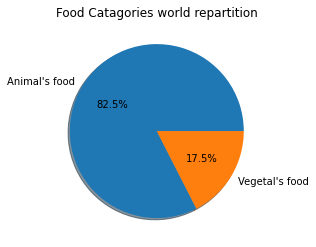

In [120]:
prop_dispo_alim_animal = (dispo_alim_total - dispo_total_alim_vege)/ dispo_alim_total
prop_dispo_alim_vege = dispo_total_alim_vege / dispo_alim_total
plt.pie([prop_dispo_alim_vege, prop_dispo_alim_animal], labels=["Animal's food","Vegetal's food"], shadow=True, autopct='%1.1f%%')
plt.title("Food Catagories world repartition")
plt.show()

In [121]:
# écrire une fonction pour scaler le résultat produit végétale et produit animale

def get_theorical_number(dispo_alim : pd.DataFrame, pop_pays : pd.DataFrame, origine='all') -> float :
        
        if origine != 'all':
            dispo_alim_pays = dispo_alim[dispo_alim['Origine'] == origine][['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum()
        else :
            dispo_alim_pays = dispo_alim[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum()
        capacite_alim_pays = pop_pays.join(dispo_alim_pays, 'Zone')
        capacite_alim_pays['Disponibilité alimentaire totale'] = capacite_alim_pays['Disponibilité alimentaire (Kcal/personne/jour)'] * capacite_alim_pays['Valeur'] * 1000
        dispo_totale_alim = capacite_alim_pays['Disponibilité alimentaire totale'].sum()
        theorical_number = dispo_totale_alim / 2500
        return theorical_number

In [129]:
get_theorical_number(dispo_alim, pop_pays_2017)

8367593850.9324

## 2.4 The use of the world food stock 

In [131]:
#disp_int = aliment_animaux + autre_utilisation + alim_humaine + export - perte

In [154]:
size = dispo_alim_copy[['Aliments pour animaux', 'Autres Utilisations', 'Exportations - Quantité','Nourriture', 'Pertes']].sum()

In [155]:
dispo_alim_copy['Disponibilité intérieure'].sum()

9848994.0

In [183]:
size

Aliments pour animaux      1304245.0
Autres Utilisations         865023.0
Exportations - Quantité    1352158.0
Nourriture                 4876258.0
Pertes                      453698.0
dtype: float64

In [156]:
sum(dispo_alim_copy[['Aliments pour animaux', 'Autres Utilisations', 'Exportations - Quantité','Nourriture', 'Pertes']].sum())

8851382.0

In [157]:
aide_alim['Valeur'].sum()

11035901

In [187]:
def func(pct, allvals):
    absolute = int(np.round(pct/100. * np.sum(allvals)))
    return "{:.1f}%\n({:d} m.t)".format(pct, absolute)

In [188]:
lambda pct, allvalls : func(pct,allvals)

<function __main__.<lambda>(pct, allvalls)>

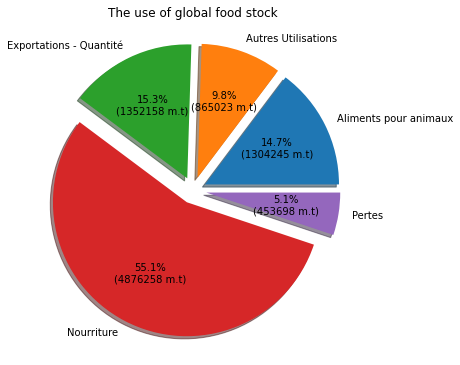

In [215]:
allvals = sum(size) 
plt.figure(figsize=(6,10))
plt.pie(x=size / allvals,
        labels= ['Aliments pour animaux', 'Autres Utilisations', 'Exportations - Quantité','Nourriture', 'Pertes'], 
        shadow = True,
        autopct = lambda pct : func(pct,allvals),
        textprops=dict(color="black", size="10"),
        explode = [0.1,0.1,0.1,0.1,0.1]
       )
plt.title("The use of global food stock")
plt.show()

## 3.1 Mélanie's requests 